# Calibration analysis

In [155]:
import os
import numpy as np
import pandas as pd

from snakemake.utils import Paramspace

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

from itertools import product

In [156]:
def qqplot(x, ax, **plot_kwargs):
    (osm, osr), _ = probplot(x, dist='uniform')
    df = pd.DataFrame({'osm': -np.log10(osm), 'osr': -np.log10(osr)})
    sns.scatterplot(x='osm', y='osr', data=df, ax=ax, edgecolor=None, s=12, **plot_kwargs)
    m = min(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.plot([0, m], [0, m], c='grey', linestyle=':')
    ax.set(xlabel=r'Expected $-\log_{10} P$', ylabel=r'Observed $-\log_{10} P$')

In [157]:
test_colors = {
    'CellRegMap': 'royalblue',
    'CellRegMap-FixedSingleEnv': 'orangered',
    'CellRegMap-FixedMultiEnv': 'green',
    'CellRegMap-Association': 'darkred',
}

## Read dataframe with simulation parameters

In [158]:
params = pd.read_csv('../params.csv')
params['outfile'] = [p + '_pvals.txt' for p in Paramspace(params).instance_patterns]

Filter for experiments with no causal GxE effect:

In [159]:
params['exists'] = params['outfile'].apply(lambda x: os.path.exists('../results/simulations/' + x))

In [160]:
params

,model,n_cells,n_env_tested,outfile,exists
0,cellregmap,100,20,model~cellregmap/n_cells~100/n_env_tested~20_p...,True
1,cellregmap_fixed_single_env,100,20,model~cellregmap_fixed_single_env/n_cells~100/...,True
2,cellregmap_assoc,100,20,model~cellregmap_assoc/n_cells~100/n_env_teste...,True
3,cellregmap,50,10,model~cellregmap/n_cells~50/n_env_tested~10_pv...,True
4,cellregmap_fixed_single_env,50,10,model~cellregmap_fixed_single_env/n_cells~50/n...,True
5,cellregmap_fixed_multi_env,50,10,model~cellregmap_fixed_multi_env/n_cells~50/n_...,True
6,cellregmap,50,20,model~cellregmap/n_cells~50/n_env_tested~20_pv...,True
7,cellregmap_fixed_single_env,50,20,model~cellregmap_fixed_single_env/n_cells~50/n...,True
8,cellregmap_fixed_multi_env,50,20,model~cellregmap_fixed_multi_env/n_cells~50/n_...,False
9,cellregmap,100,10,model~cellregmap/n_cells~100/n_env_tested~10_p...,True


In [161]:
params = params.query('exists').reset_index(drop=True)

In [162]:
params

,model,n_cells,n_env_tested,outfile,exists
0,cellregmap,100,20,model~cellregmap/n_cells~100/n_env_tested~20_p...,True
1,cellregmap_fixed_single_env,100,20,model~cellregmap_fixed_single_env/n_cells~100/...,True
2,cellregmap_assoc,100,20,model~cellregmap_assoc/n_cells~100/n_env_teste...,True
3,cellregmap,50,10,model~cellregmap/n_cells~50/n_env_tested~10_pv...,True
4,cellregmap_fixed_single_env,50,10,model~cellregmap_fixed_single_env/n_cells~50/n...,True
5,cellregmap_fixed_multi_env,50,10,model~cellregmap_fixed_multi_env/n_cells~50/n_...,True
6,cellregmap,50,20,model~cellregmap/n_cells~50/n_env_tested~20_pv...,True
7,cellregmap_fixed_single_env,50,20,model~cellregmap_fixed_single_env/n_cells~50/n...,True
8,cellregmap,100,10,model~cellregmap/n_cells~100/n_env_tested~10_p...,True
9,cellregmap_fixed_single_env,100,10,model~cellregmap_fixed_single_env/n_cells~100/...,True


In [163]:
params['model'] = params['model'].replace({
    'cellregmap': 'CellRegMap',
    'cellregmap_fixed_single_env': 'CellRegMap-FixedSingleEnv',
    'cellregmap_fixed_multi_env': 'CellRegMap-FixedMultiEnv',
    'cellregmap_assoc': 'CellRegMap-Association'
})

## Plot quantile distribution

In [164]:
params.query('n_cells == 50')

,model,n_cells,n_env_tested,outfile,exists
3,CellRegMap,50,10,model~cellregmap/n_cells~50/n_env_tested~10_pv...,True
4,CellRegMap-FixedSingleEnv,50,10,model~cellregmap_fixed_single_env/n_cells~50/n...,True
5,CellRegMap-FixedMultiEnv,50,10,model~cellregmap_fixed_multi_env/n_cells~50/n_...,True
6,CellRegMap,50,20,model~cellregmap/n_cells~50/n_env_tested~20_pv...,True
7,CellRegMap-FixedSingleEnv,50,20,model~cellregmap_fixed_single_env/n_cells~50/n...,True


In [165]:
params.query('n_cells == 100')

,model,n_cells,n_env_tested,outfile,exists
0,CellRegMap,100,20,model~cellregmap/n_cells~100/n_env_tested~20_p...,True
1,CellRegMap-FixedSingleEnv,100,20,model~cellregmap_fixed_single_env/n_cells~100/...,True
2,CellRegMap-Association,100,20,model~cellregmap_assoc/n_cells~100/n_env_teste...,True
8,CellRegMap,100,10,model~cellregmap/n_cells~100/n_env_tested~10_p...,True
9,CellRegMap-FixedSingleEnv,100,10,model~cellregmap_fixed_single_env/n_cells~100/...,True
10,CellRegMap-FixedMultiEnv,100,10,model~cellregmap_fixed_multi_env/n_cells~100/n...,True


../results/simulations/model~cellregmap/n_cells~50/n_env_tested~10_pvals.txt
../results/simulations/model~cellregmap_fixed_single_env/n_cells~50/n_env_tested~10_pvals.txt
../results/simulations/model~cellregmap_fixed_multi_env/n_cells~50/n_env_tested~10_pvals.txt


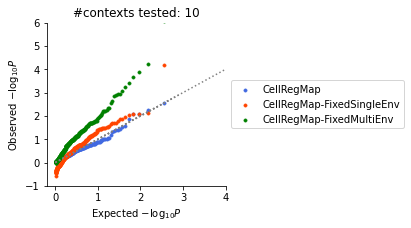

In [166]:
fig, ax = plt.subplots(figsize=(4, 3))
for i in params.query('n_cells == 50 and n_env_tested == 10').index:
    fname = '../results/simulations/' + params.loc[i, 'outfile']
    print(fname)
    pvals = pd.read_csv(fname, header=None).to_numpy()
    pvals.shape
    pvals = pvals.flatten()
    model = params.loc[i, 'model']
    qqplot(pvals, ax, label=model, color=test_colors[model])
ax.set(xlim=[-0.2, 4], ylim=[-1, 6])
m = min(ax.get_xlim()[1], ax.get_ylim()[1])
ax.plot([0, m], [0, m], c='grey', linestyle=':')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set(title='#contexts tested: 10')
sns.despine()

../results/simulations/model~cellregmap_assoc/n_cells~100/n_env_tested~20_pvals.txt


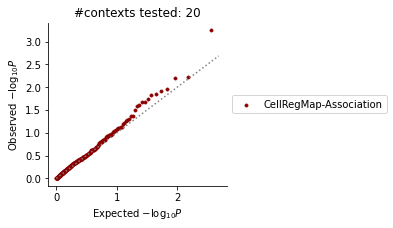

In [144]:
fig, ax = plt.subplots(figsize=(4, 3))
entry = params.query('model == "CellRegMap-Association"')
fname = '../results/simulations/' + entry['outfile'].item()
print(fname)
pvals = pd.read_csv(fname, header=None).to_numpy()
pvals.shape
pvals = pvals.flatten()
model = entry['model'].item()
qqplot(pvals, ax, label=model, color=test_colors[model])   
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set(title='#contexts tested: 20')
sns.despine()

## Runtime

In [199]:
df = pd.DataFrame({
    25: [3.5],
    50: [4.8],
    75: [6.8780763149261475],
    100: [7.466227293014526]
})

In [200]:
df = df.T.reset_index()
df.columns = ['n_cells', 'time']

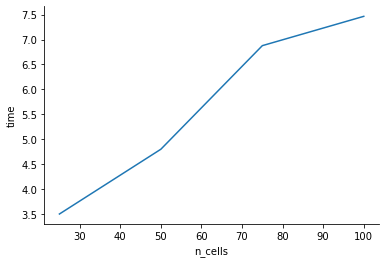

In [202]:
sns.lineplot(x='n_cells', y='time', data=df)
sns.despine()